<a href="https://colab.research.google.com/github/Harsh-Vardhan-Singh969/Sales-Data-Analysis-of-Small-Stores-/blob/main/Sales_Data_Analysis_of_Small_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data sample:
        Date   Store_ID Region     Category     Product  Amount
0 2020-01-01  Store_007  Urban      Grocery      Bakery    6.95
1 2020-01-01  Store_003  Urban  Electronics      Laptop   41.55
2 2020-01-01  Store_006  Urban  Electronics  Headphones   38.72
3 2020-01-01  Store_012  Urban  Electronics      Tablet   27.59
4 2020-01-01  Store_010  Rural  Electronics  Headphones   22.84

Total transactions: 64,350


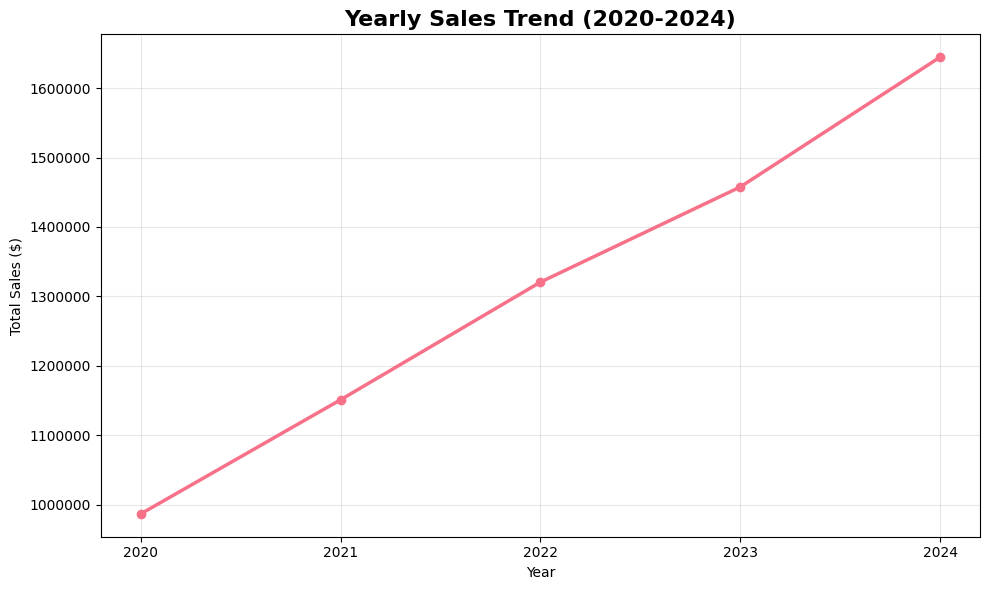

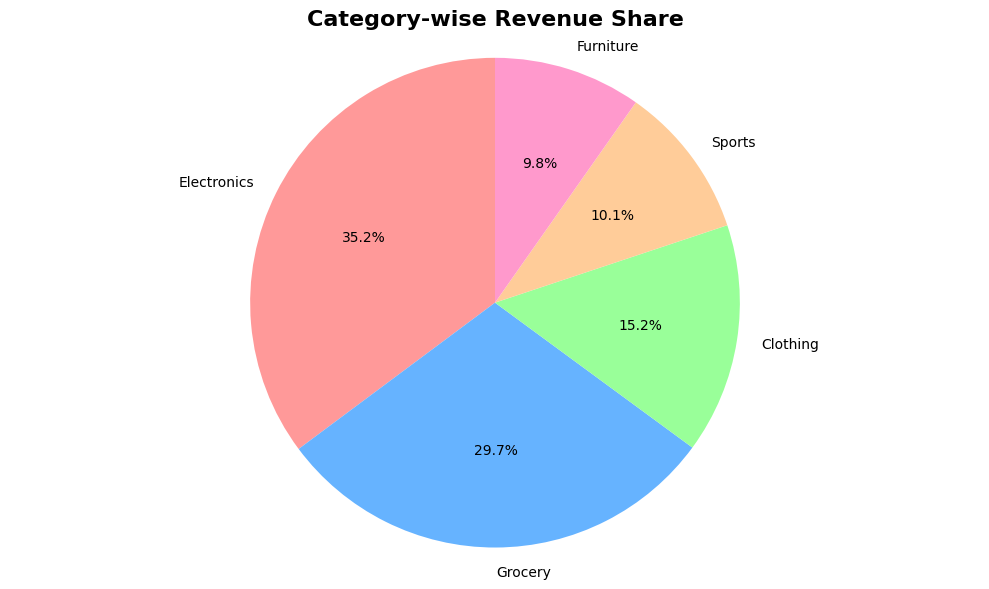

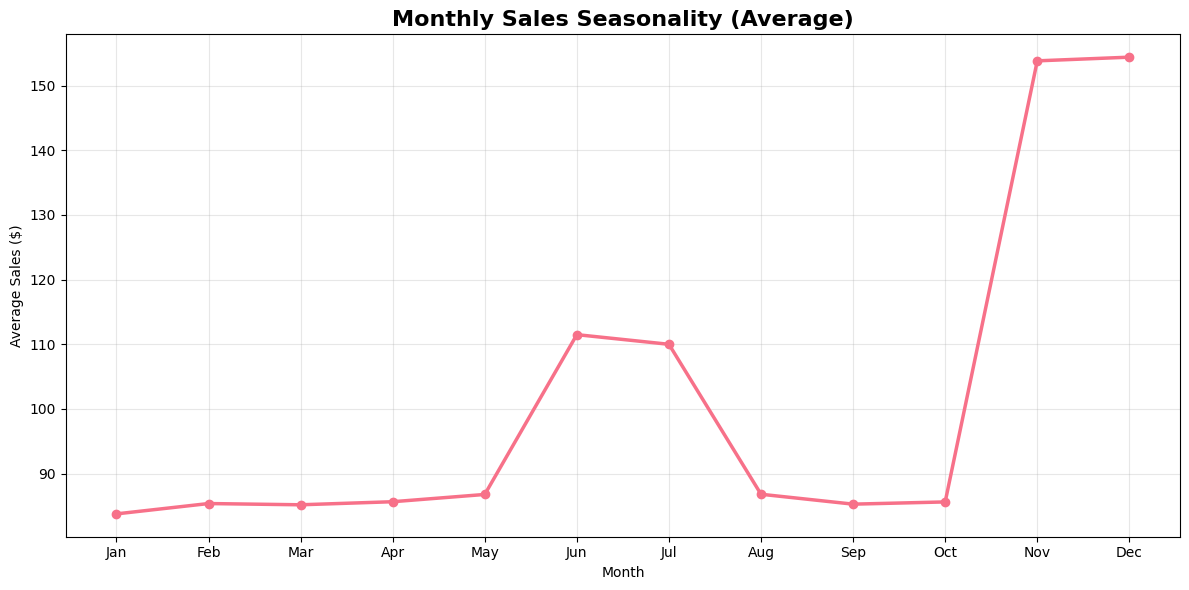

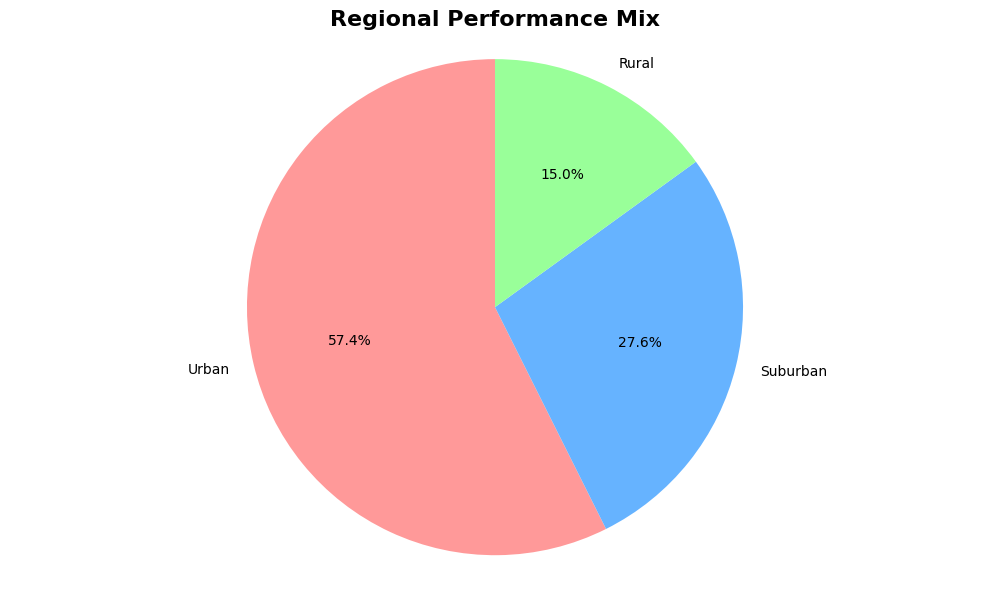

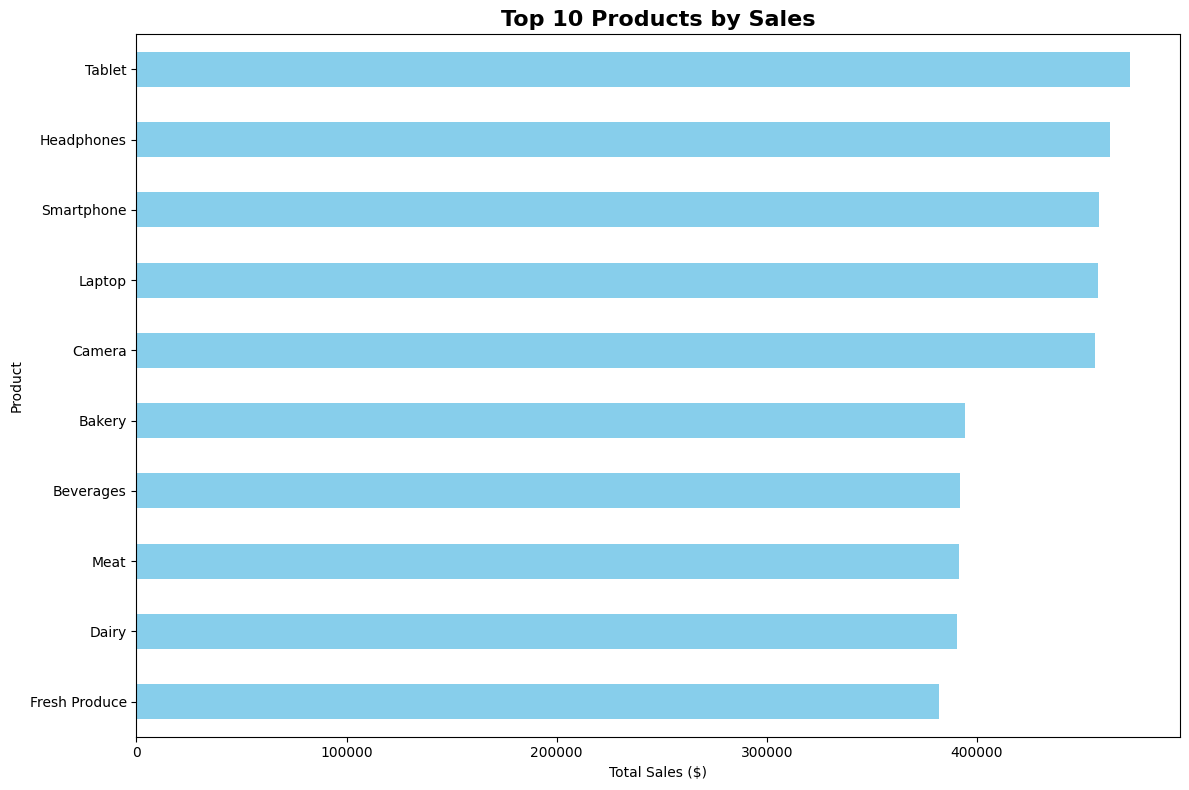

Sample Data Table (First 10 Records):
      Date  Store_ID   Region    Category     Product  Amount
2020-01-01 Store_007    Urban     Grocery      Bakery    6.95
2020-01-01 Store_003    Urban Electronics      Laptop   41.55
2020-01-01 Store_006    Urban Electronics  Headphones   38.72
2020-01-01 Store_012    Urban Electronics      Tablet   27.59
2020-01-01 Store_010    Rural Electronics  Headphones   22.84
2020-01-01 Store_019 Suburban     Grocery        Meat    4.48
2020-01-01 Store_003    Urban   Furniture     Storage   49.34
2020-01-01 Store_014    Rural   Furniture      Chairs   40.71
2020-01-01 Store_002    Urban    Clothing Accessories   61.85
2020-01-01 Store_014    Rural     Grocery       Dairy   16.00

KPI SNAPSHOT
Total Sales Period: 2020-01-01 to 2024-12-31
Total Revenue: $6,560,688.76
Average Transaction Value: $101.95
Number of Stores: 20
Best Performing Category: Electronics ($2,308,839.43)
Best Performing Region: Urban ($3,765,058.67)

RECOMMENDATIONS:
1. Double down on 

In [2]:
# -*- coding: utf-8 -*-
"""Sales_Data_Analysis_with_Visuals.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1abc123def456ghi789jkl
"""

# Sales Data Analysis of Small Stores
# Trends • Insights • Visualizations

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")

# Generate synthetic sales data (2020-2024)
np.random.seed(42)  # For reproducibility

# Create date range
dates = pd.date_range('2020-01-01', '2024-12-31', freq='D')

# Generate store data
stores = [f'Store_{i:03d}' for i in range(1, 21)]
regions = ['Urban'] * 10 + ['Suburban'] * 6 + ['Rural'] * 4
random.shuffle(regions)
store_region_map = {store: region for store, region in zip(stores, regions)}

# Generate product categories and products
categories = ['Electronics', 'Grocery', 'Clothing', 'Furniture', 'Sports']
products = {
    'Electronics': ['Smartphone', 'Laptop', 'Tablet', 'Headphones', 'Camera'],
    'Grocery': ['Fresh Produce', 'Dairy', 'Bakery', 'Meat', 'Beverages'],
    'Clothing': ['Shirts', 'Pants', 'Shoes', 'Accessories', 'Outerwear'],
    'Furniture': ['Chairs', 'Tables', 'Sofas', 'Beds', 'Storage'],
    'Sports': ['Equipment', 'Apparel', 'Footwear', 'Accessories', 'Nutrition']
}

# Generate synthetic sales data
data = []
for date in dates:
    if np.random.random() < 0.7:  # 70% chance of having sales each day
        num_transactions = np.random.poisson(50)  # Average 50 transactions per day
        for _ in range(num_transactions):
            store = np.random.choice(stores)
            category = np.random.choice(categories, p=[0.35, 0.30, 0.15, 0.10, 0.10])
            product = np.random.choice(products[category])

            # Seasonal adjustment
            month = date.month
            seasonal_factor = 1.0
            if month in [11, 12]:  # holiday season
                seasonal_factor = 1.8
            elif month in [6, 7]:  # summer season
                seasonal_factor = 1.3

            # Regional adjustment
            region_factor = 1.0
            if store_region_map[store] == 'Urban':
                region_factor = 1.5
            elif store_region_map[store] == 'Suburban':
                region_factor = 1.2

            # Yearly growth factor
            year_growth = 1.0 + (date.year - 2020) * 0.15

            amount = np.random.gamma(shape=2, scale=25) * seasonal_factor * region_factor * year_growth
            amount = round(amount, 2)

            data.append({
                'Date': date,
                'Store_ID': store,
                'Region': store_region_map[store],
                'Category': category,
                'Product': product,
                'Amount': amount
            })

# Create DataFrame
df = pd.DataFrame(data)
print("Data sample:")
print(df.head())
print(f"\nTotal transactions: {len(df):,}")

# 1. Yearly Sales Trend
plt.figure(figsize=(10, 6))
yearly_sales = df.groupby(df['Date'].dt.year)['Amount'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=2.5)
plt.title('Yearly Sales Trend (2020-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_sales.index)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 2. Category-wise Revenue Share
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Category-wise Revenue Share', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Monthly Sales Seasonality
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df['Date'].dt.month)['Amount'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_sales.values, marker='o', linewidth=2.5)
plt.title('Monthly Sales Seasonality (Average)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Regional Performance Mix
plt.figure(figsize=(10, 6))
regional_sales = df.groupby('Region')['Amount'].sum().sort_values(ascending=False)
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(regional_sales.values, labels=regional_sales.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Regional Performance Mix', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 5. Top Products by Sales
plt.figure(figsize=(12, 8))
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 6. Sample Data Table
print("Sample Data Table (First 10 Records):")
print(df.head(10).to_string(index=False))

# 7. KPI Snapshot
print("\n" + "="*50)
print("KPI SNAPSHOT")
print("="*50)
print(f"Total Sales Period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Revenue: ${df['Amount'].sum():,.2f}")
print(f"Average Transaction Value: ${df['Amount'].mean():.2f}")
print(f"Number of Stores: {df['Store_ID'].nunique()}")
print(f"Best Performing Category: {category_sales.index[0]} (${category_sales.iloc[0]:,.2f})")
print(f"Best Performing Region: {regional_sales.index[0]} (${regional_sales.iloc[0]:,.2f})")
print("="*50)

# 8. Recommendations
print("\nRECOMMENDATIONS:")
print("1. Double down on peak-season inventory and campaigns.")
print("2. Expand electronics assortment in high-performing urban stores.")
print("3. Build targeted promos in suburban areas to lift share.")
print("4. Use demand forecasting to reduce stockouts.")
print("5. Track repeat-customer initiatives to raise loyalty.")

# 9. Conclusion
print("\nCONCLUSION:")
print("Sales analysis reveals clear growth and category concentration.")
print("Seasonality and regional mix guide inventory and marketing.")
print("Continue monitoring trends to sustain momentum.")

# Save the data to CSV for future use
df.to_csv('small_stores_sales_data.csv', index=False)
print("\nData saved to 'small_stores_sales_data.csv'")